<h1 align="center">Data Cleaning</h1>

In [1]:
import pandas as pd
import numpy as np
pd.isnull(pd.Series([1,2,3,np.nan,7]))

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [2]:
pd.notnull(pd.Series([1,2,3,np.nan,7]))

0     True
1     True
2     True
3    False
4     True
dtype: bool

In [6]:
pd.isnull(pd.DataFrame({"column A":[1,2,np.nan],
                       "column B":[4,np.nan,6],
                        "column c":[np.nan,7,np.nan]
                       }))

,column A,column B,column c
0,False,False,True
1,False,True,False
2,True,False,True


In [21]:
s=pd.DataFrame({"column A":[1,2,np.nan],
                       "column B":[3,6,4],
                        "column c":[np.nan,7,np.nan]
                       })

In [8]:
pd.isnull(s).sum()

column A    1
column B    1
column c    2
dtype: int64

In [9]:
pd.notnull(s).sum()

column A    2
column B    2
column c    1
dtype: int64

In [10]:
s[pd.notnull(s)]

,column A,column B,column c
0,1.0,4.0,NaN
1,2.0,NaN,7.0
2,NaN,6.0,NaN


In [11]:
s.isnull()

,column A,column B,column c
0,False,False,True
1,False,True,False
2,True,False,True


In [12]:
s.notnull()

,column A,column B,column c
0,True,True,False
1,True,False,True
2,False,True,False


In [13]:
s[s.notnull()]

,column A,column B,column c
0,1.0,4.0,NaN
1,2.0,NaN,7.0
2,NaN,6.0,NaN


In [14]:
s.dropna()

,column A,column B,column c


In [23]:
s

,column A,column B,column c
0,1.0,3,NaN
1,2.0,6,7.0
2,NaN,4,NaN


In [24]:
s.dropna(axis=0)

,column A,column B,column c
1,2.0,6,7.0


In [25]:
s.fillna(0)

,column A,column B,column c
0,1.0,3,0.0
1,2.0,6,7.0
2,0.0,4,0.0


In [26]:
s

,column A,column B,column c
0,1.0,3,NaN
1,2.0,6,7.0
2,NaN,4,NaN


In [27]:
s.fillna(s.mean())

,column A,column B,column c
0,1.0,3,7.0
1,2.0,6,7.0
2,1.5,4,7.0


In [28]:
s.fillna(method="ffill")

,column A,column B,column c
0,1.0,3,NaN
1,2.0,6,7.0
2,2.0,4,7.0


In [29]:
s

,column A,column B,column c
0,1.0,3,NaN
1,2.0,6,7.0
2,NaN,4,NaN


In [30]:
s.fillna(method="bfill")

,column A,column B,column c
0,1.0,3,7.0
1,2.0,6,7.0
2,NaN,4,NaN


In [32]:
s.fillna({"column A":8,"column c":19})

,column A,column B,column c
0,1.0,3,19.0
1,2.0,6,7.0
2,8.0,4,19.0


In [34]:
s["column A"].unique()

array([ 1.,  2., nan])

In [39]:
s["column A"].replace({np.nan:19,2:4})

0     1.0
1     4.0
2    19.0
Name: column A, dtype: float64

In [40]:
s

,column A,column B,column c
0,1.0,3,NaN
1,2.0,6,7.0
2,NaN,4,NaN


In [43]:
h=pd.DataFrame([1,2,2,3,4,5,5,5,6,],index=np.arange(19,28))
h

,0
19,1
20,2
21,2
22,3
23,4
24,5
25,5
26,5
27,6


In [45]:
h.duplicated()

19    False
20    False
21     True
22    False
23    False
24    False
25     True
26     True
27    False
dtype: bool

In [46]:
h.duplicated(keep="last")

19    False
20     True
21    False
22    False
23    False
24     True
25     True
26    False
27    False
dtype: bool

In [48]:
h

,0
19,1
20,2
21,2
22,3
23,4
24,5
25,5
26,5
27,6


In [47]:
h.duplicated(keep=False)

19    False
20     True
21     True
22    False
23    False
24     True
25     True
26     True
27    False
dtype: bool

In [50]:
h.drop_duplicates()

,0
19,1
20,2
22,3
23,4
24,5
27,6


In [51]:
h.drop_duplicates(keep="last")

,0
19,1
21,2
22,3
23,4
26,5
27,6


In [52]:
h.drop_duplicates(keep=False)

,0
19,1
22,3
23,4
27,6


<AxesSubplot:>

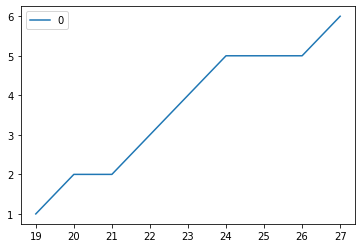

In [53]:
h.plot()

In [55]:
players=pd.DataFrame({"name":["kobe","leborn","kobe","carmelo","kobe"],
                     "pos":["sg","sf","sg","sf","sf"]
                     })
players

,name,pos
0,kobe,sg
1,leborn,sf
2,kobe,sg
3,carmelo,sf
4,kobe,sf


In [56]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [57]:
players.drop_duplicates()

,name,pos
0,kobe,sg
1,leborn,sf
3,carmelo,sf
4,kobe,sf


In [60]:
players.duplicated(subset=["name"])

0    False
1    False
2     True
3    False
4     True
dtype: bool

<h1 align="center",style="color:magenta">Text Handling</h1>

In [78]:
df=pd.DataFrame({"name":["1987_M_US_1","1990?_M_UK_1","1992_F_US_2","1970?_M_IT_1","1985_F_IT_2"]})
df

,name
0,1987_M_US_1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_IT_1
4,1985_F_IT_2


In [80]:
df["name"].str.split("_")

0     [1987, M, US, 1]
1    [1990?, M, UK, 1]
2     [1992, F, US, 2]
3    [1970?, M, IT, 1]
4     [1985, F, IT, 2]
Name: name, dtype: object

In [81]:
df=df["name"].str.split("_",expand=True)

In [82]:
df.columns

RangeIndex(start=0, stop=4, step=1)

In [83]:
df.columns=["year","sex","country","#children"]

In [84]:
df

,year,sex,country,#children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,IT,2


In [85]:
df["year"].str.contains("\?")

0    False
1     True
2    False
3     True
4    False
Name: year, dtype: bool

In [86]:
df["country"]

0    US
1    UK
2    US
3    IT
4    IT
Name: country, dtype: object